In [1]:
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
convnet = Sequential()
convnet.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
convnet.add(MaxPooling2D((2, 2)))
convnet.add(Conv2D(64, (3, 3), activation='relu'))
convnet.add(MaxPooling2D((2, 2)))
convnet.add(Conv2D(64, (3, 3), activation='relu'))
convnet.add(Flatten())
convnet.add(Dense(64, activation='relu'))
convnet.add(Dense(10, activation='softmax'))

In [5]:
convnet.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
convnet.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 43s 44ms/step - loss: 0.1667 - accuracy: 0.9479
Epoch 2/5
938/938 [==============================] - 38s 41ms/step - loss: 0.0469 - accuracy: 0.9858
Epoch 3/5
938/938 [==============================] - 38s 41ms/step - loss: 0.0324 - accuracy: 0.9901
Epoch 4/5
938/938 [==============================] - 39s 41ms/step - loss: 0.0242 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 225s 240ms/step - loss: 0.0186 - accuracy: 0.9942


In [7]:
test_loss, test_acc = convnet.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.0296 - accuracy: 0.9912


In [8]:
convnet.save("../neural_networks/convnet_model")

INFO:tensorflow:Assets written to: ../neural_networks/convnet_model\assets


INFO:tensorflow:Assets written to: ../neural_networks/convnet_model\assets


In [9]:
reconstructed_convnet = load_model("../neural_networks/convnet_model")

In [10]:
new_digit = np.array(
[[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,195,255,240,255,225,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,255,255,225,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,255,255,255,255,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,255,255,255,255,255,0,0,255,255,255,195,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,255,255,255,255,0,0,0,0,0,255,255,225,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,210,255,255,195,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,255,255,210,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,180,255,255,255,195,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,195,255,255,255,255,0,0,0,255,255,255,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,180,255,255,255,255,210,255,255,255,195,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,255,225,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,240,255,255,255,255,255,255,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,255,255,255,240,195,255,255,255,195,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,255,255,255,195,0,0,0,255,255,255,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,180,255,255,240,0,0,0,0,225,255,255,195,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,225,255,255,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,210,255,210,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,180,255,255,240,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,240,255,255,195,0,180,195,225,255,255,255,180,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,255,255,255,255,240,255,255,255,255,180,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,255,255,255,255,225,210,210,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,180,210,195,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
)


In [11]:
new_digit = new_digit.reshape((1, 28, 28, 1))
new_digit = new_digit.astype('float32') / 255

In [12]:
result = reconstructed_convnet.predict(new_digit)

1/1 [==============================] - 0s 115ms/step


In [13]:
result

array([[1.5683569e-13, 4.5475441e-15, 2.9829664e-08, 2.6315608e-11,
        1.7676300e-14, 1.6681639e-13, 1.0216900e-14, 3.7239787e-15,
        1.0000000e+00, 2.6188098e-13]], dtype=float32)

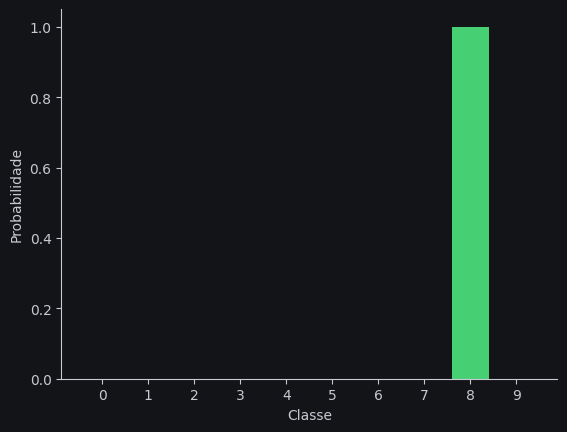

In [14]:
plt.rcParams['axes.facecolor'] = '#131417'
plt.rcParams['figure.facecolor'] = '#131417'
plt.bar(np.arange(10), result[0], color="#47CF73")
plt.xticks(np.arange(10))
plt.ylabel("Probabilidade")
plt.xlabel("Classe")

ax = plt.gca()
ax.xaxis.label.set_color('#C7C9D3')        #setting up X-axis label color to yellow
ax.yaxis.label.set_color('#C7C9D3')          #setting up Y-axis label color to blue

ax.tick_params(axis='x', colors='#C7C9D3')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='#C7C9D3')  #setting up Y-axis tick color to black

ax.spines['bottom'].set_color('#C7C9D3')        # setting up Y-axis tick color to red
ax.spines['left'].set_color('#C7C9D3')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('chart_probs_convnet.png', dpi=300)

In [15]:
result[0].argmax()

8